In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("student_data.csv")
print(df)

       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0               0  female         NaN   bachelor's degree      standard   
1               1  female     group C        some college      standard   
2               2  female     group B     master's degree      standard   
3               3    male     group A  associate's degree  free/reduced   
4               4    male     group C        some college      standard   
...           ...     ...         ...                 ...           ...   
30636         816  female     group D         high school      standard   
30637         890    male     group E         high school      standard   
30638         911  female         NaN         high school  free/reduced   
30639         934  female     group D  associate's degree      standard   
30640         960    male     group B        some college      standard   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0           none    

In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
#delete "unnamed:" column
df=df.drop("Unnamed: 0",axis=1)
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


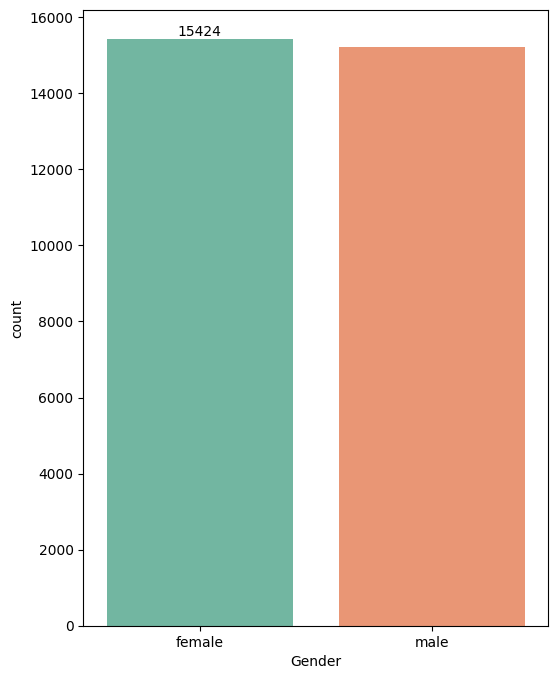

In [7]:
plt.figure(figsize=(6,8))
ax=sns.countplot(x="Gender", hue="Gender",data=df, palette="Set2",legend=False)
ax.bar_label(ax.containers[0])
plt.show()

In [8]:
#from above barchar,it is concluded that number of female are more than male.

In [9]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
gb

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


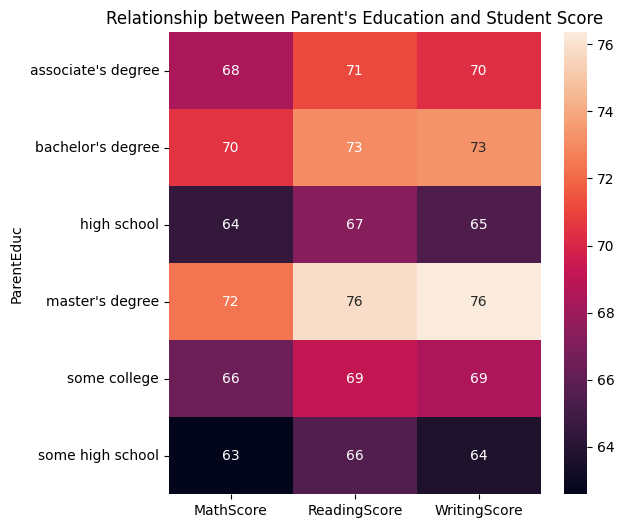

In [10]:
plt.figure(figsize=(6,6))
sns.heatmap(gb,annot=True)
plt.title("Relationship between Parent's Education and Student Score")
plt.show()

In [11]:
#Parent's Education affect in Score

In [12]:
ms=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
ms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


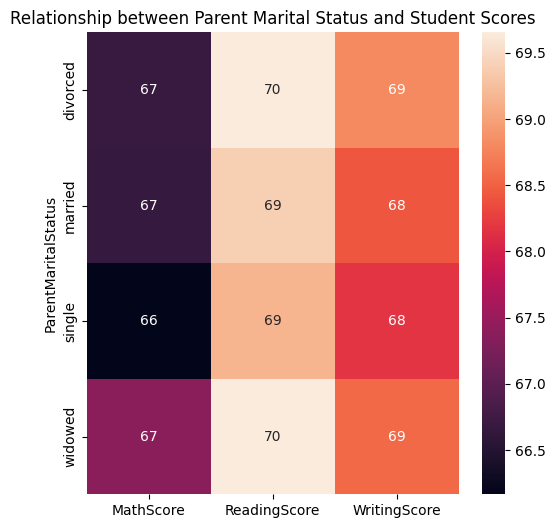

In [13]:
plt.figure(figsize=(6,6))
sns.heatmap(ms,annot=True)
plt.title("Relationship between Parent Marital Status and Student Scores")
plt.show()

In [14]:
#Parent marital status affecting Score is negligible.

In [15]:
study_hours=df.groupby("WklyStudyHours").agg({"MathScore":'mean',"ReadingScore":'mean',"WritingScore":'mean'})
study_hours

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


Text(0.5, 1.0, 'Relationship between Weekly study hours and Academic Score')

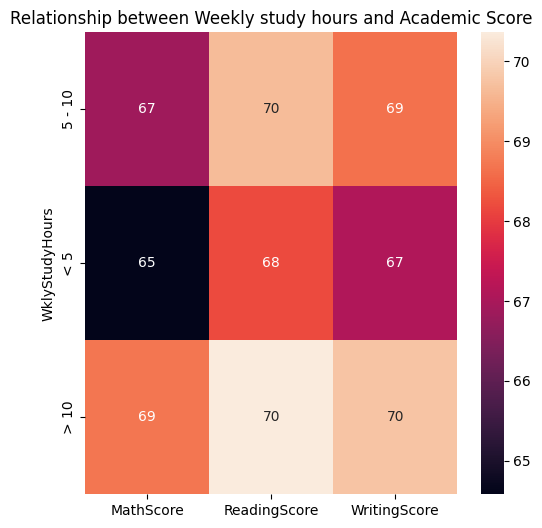

In [16]:
plt.figure(figsize=(6,6))
sns.heatmap(study_hours,annot=True)
plt.title("Relationship between Weekly study hours and Academic Score")

In [17]:
#weeklystudy hours affect Student's Score

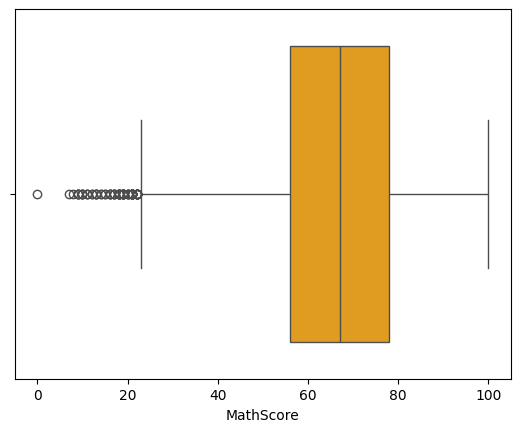

In [18]:
sns.boxplot(x="MathScore",data=df,color="orange")
plt.show()

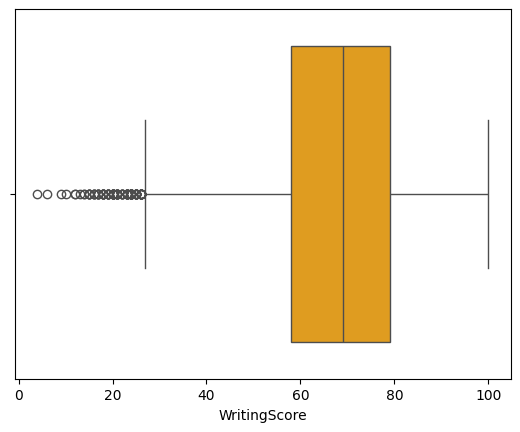

In [19]:
sns.boxplot(x="WritingScore",data=df,color="orange")
plt.show()

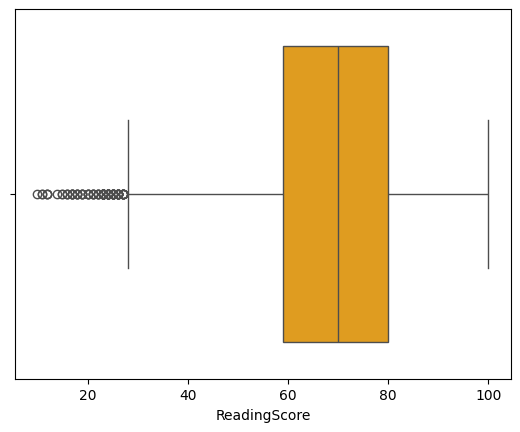

In [20]:
sns.boxplot(x="ReadingScore",data=df,color="orange")
plt.show()

In [21]:
#math is comparatively difficult than reading and writing

In [22]:

print(df["EthnicGroup"].unique())


[nan 'group C' 'group B' 'group A' 'group D' 'group E']


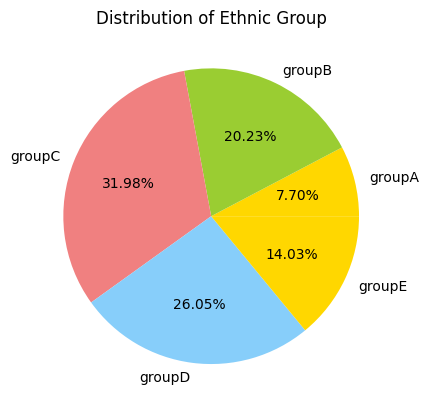

In [23]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()
groupB=df.loc[(df["EthnicGroup"]== "group B")].count()
groupC=df.loc[(df["EthnicGroup"]== "group C")].count()
groupD=df.loc[(df["EthnicGroup"]== "group D")].count()
groupE=df.loc[(df["EthnicGroup"]== "group E")].count()
l=["groupA","groupB","groupC","groupD","groupE"]
mylist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']  
plt.pie(mylist,labels=l,colors=colors,autopct="%1.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()